In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Logistic Regression



---


Welcome to today's class. Here we will learn about logistic regression and code it up. If you are ready then let's get started!.

As we have learnt already, logistic regression is used in the problem of binary classification where you have some input features $X \in \mathbf{R}^{NXD}$ and binary targets $y\in \{0,1\}$.

- Intuitively, we want a separator which could be a simple line (for our 2D data), also called a ***hyperplane*** or ***decision boundary***. 
In a simple setting, the probability that the target y assumes a value of 0 and 1 are written as; $$p(y=1|x,\theta) = h_\theta(x) $$
$$p(y=0|x,\theta) = 1 - h_\theta(x)$$

where $$h_\theta(z) = \frac{1}{1+\text{exp}(-z)}$$ and $$z = \theta^Tx + b$$

- We can then write the our bernoulli likelihood as 
$$p(y|x,\theta) = h_\theta(z)^y (1- h_\theta(z))^{(1-y)} $$ 


---


### Negative log-likelihood/ Cost function (for N examples);


---


$$-\text{log}p(y|x,\theta) = -\frac{1}{N}\sum^N_{i=1}(y_i\text{log}h_\theta(x_i) + (1 - y_i)\text{log}(1 - h_\theta(x_i))$$

Note that we are interested in maximizing the log-likelihood == minimizing the negative log-likelihood in our maximum likelihood estimation (MLE) formulation == minimizing the empirical risk.

The negative log-likelihood for binary classification task is also referred to as the *binary cross-entropy loss*.

---
### Gradient
---

- You can train your logistic regression model now with gradient descent method of your choice.
If you would remember $$\frac{\delta\mathcal{L}}{dw} = \frac{1}{N}\sum_{i=1}^{N}(h_\theta(x_i) - y_i)x_i$$
$$\frac{\delta\mathcal{L}}{db} = \frac{1}{N}\sum_{i=1}^{N}(h_\theta(x_i) - y_i)$$
---


1. As a first step, lets get some data and visualise them.
Before you do any learning on this data, can you think of a good hyperplane that can separate the two classes well?

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

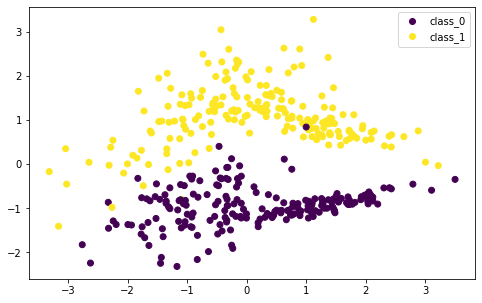

In [31]:
# generate classification data
X, y = datasets.make_classification(400, 2, 2, 0, random_state=1004)

fig = plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=['class_0','class_1'])

2. Split the data into train and test. 

In [32]:
X_train, X_test, y_train, y_test =  train_test_split( X, y, test_size=0.33, random_state=42)

3. Next can you guess and list the variables and functions you need for a complete logistic regression model? List them in the next cell.

In [33]:
"""
List here
Variables / parameters/ inputs/ etc
======================================
1.num_iters
2.tolerance
3.alpha (learning rate)
4.threshold
etc...

Functions
======================================
1.sigmoid
2.fit
3.evaluate
4.predict
etc...
"""
pass

In [34]:
#@title Functions and variables you need to define { display-mode: "form" }
"""
Great!
If you listed the following, you are good to go!
1. linear function z = x\theta + b
2. sigmoid h_theta(x)
3. loss function()
4. gradient descent function
5. predict function
6. train function
7. classification error
8. accuracy function
9. plot functions etc
"""

pass

4. Code up each of these functions or methods (for a class) and finally plot the decision boundary

In [35]:
class Logistic_Reg:
  def __init__(self,num_iters = 300,tolerance = 1e-10,alpha = 0.001,threshold=0.5,verbose = False):
    self.num_iters = num_iters
    self.tolerance = tolerance
    self.alpha = alpha
    self.threshold = threshold
    self.verbose = verbose

  def add_ones(self,X):
    return np.concatenate((np.ones((len(X),1)), X), axis = 1)

  def sigmoid(self,X,theta):
    return (1/ (1 + np.exp(X@theta)))   

  def cost(self, X, y_true):
    m = X.shape[0]
    y_hat = self.sigmoid(X, self.theta)
    
    C = np.sum(-1*y_true*np.log(y_hat)-(1-y_true)*np.log(1-y_hat))
    return C

  def fit(self, X, y):
        X = X.copy()
        X = self.add_ones(X)
        y = y.reshape(-1,1)

        self.theta = np.zeros((len(X[0]), 1))
        current_iter = 1
        norm = 1
        while (norm > self.tolerance and current_iter < self.num_iters):
            old_theta = self.theta.copy()
            grad = X.T@(y - self.sigmoid(X, self.theta))
            grad= grad.reshape(-1, 1)
            self.theta = self.theta - self.alpha*grad
            if self.verbose and (current_iter%10 == 0):
                  print(f'cost for {current_iter} iteration : {self.cost(X, y)}')
            norm = np.linalg.norm(old_theta - self.theta)
            current_iter += 1    
  def evaluate(self, X, y):
    X = self.add_ones(X)
    return self.cost(X, y)

  def predict(self, X):  
    prob = self.predict_proba(X)
    return (prob >= self.threshold).astype(int)
  def predict_proba(self, X):
    X = self.add_ones(X)  
    return self.sigmoid(X, self.theta)   


In [36]:
logreg = Logistic_Reg(verbose=True)

In [37]:
logreg.fit(X_train, y_train)

cost for 10 iteration : 94.60683984686105
cost for 20 iteration : 68.89562190536873
cost for 30 iteration : 57.08945186018448
cost for 40 iteration : 50.302714904035184
cost for 50 iteration : 45.887492574526725
cost for 60 iteration : 42.78235330690394
cost for 70 iteration : 40.47865659466527
cost for 80 iteration : 38.70173201713128
cost for 90 iteration : 37.28998303813783
cost for 100 iteration : 36.14199899348382
cost for 110 iteration : 35.190850249345644
cost for 120 iteration : 34.39054135680503
cost for 130 iteration : 33.70839721077709
cost for 140 iteration : 33.12055349066599
cost for 150 iteration : 32.60916679637195
cost for 160 iteration : 32.16062399693794
cost for 170 iteration : 31.764356138677492
cost for 180 iteration : 31.412031079437806
cost for 190 iteration : 31.096990656041687
cost for 200 iteration : 30.813849982409256
cost for 210 iteration : 30.55820679439554
cost for 220 iteration : 30.32642706603547
cost for 230 iteration : 30.115484487547292
cost for 240

In [38]:
predictions = logreg.predict(X_test)
predictions = predictions.squeeze()

In [39]:
predictions

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [47]:
acc = np.sum(y_test == predictions) / len(y_test)

In [48]:
acc

0.9696969696969697

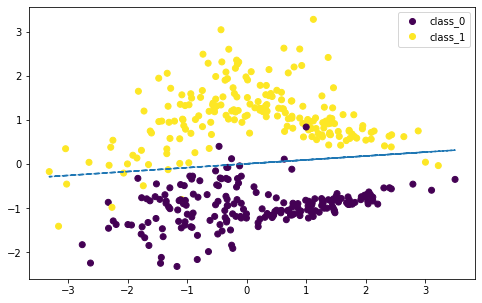

In [72]:
X, y = datasets.make_classification(400, 2, 2, 0, random_state=1004)
x = np.linspace(-5,5,100)
y_1 = -(logreg.theta[1] / logreg.theta[2]) * X[:, 0] - (logreg.theta[0]/logreg.theta[2])
fig = plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(X[:, 0],y_1,'--')
plt.legend(handles=scatter.legend_elements()[0], labels=['class_0','class_1'])

In [71]:
logreg.theta[1]

array([0.35957744])

Possible results, it might be different in your case depending on the hyperparameters
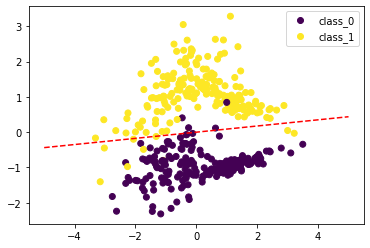
# Lets go!